In [192]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
math = pd.read_csv('stud_math.csv')
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [193]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [194]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.


In [195]:
pd.DataFrame(math.school.value_counts())

,school
GP,349
MS,46


In [100]:
math.drop(['school'], inplace = True, axis = 1)
# Этот столбец содержит всего два разных значения,
# Не содержит сведений о качестве или рейтинге школы
# Скорее всего никакой практической пользы для нашего проекта он не несёт

In [101]:
pd.DataFrame(math.sex.value_counts())
# Все поля в столбце sex заполнены,ученики распределены практически 
# в равных пропорциях

,sex
F,208
M,187


<AxesSubplot:title={'center':'кол-во учеников по возрасту'}>

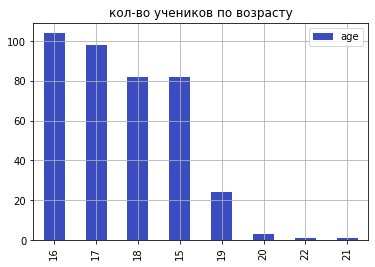

In [102]:
pd.DataFrame(math.age.value_counts()).plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'кол-во учеников по возрасту')
# Большинство студентов в датасете имеют возраст от 15 до 19 лет

In [103]:
math.address = math.address.fillna(statistics.mode(math.address))
# Так как в столбце address немного пропущенных значений,
# заменим их на самое часто встречающееся

<AxesSubplot:title={'center':'распределение по месту жительства'}>

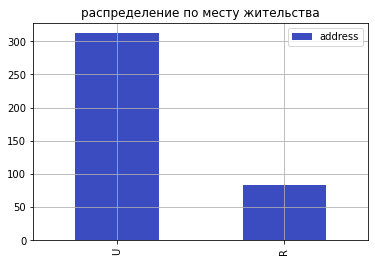

In [104]:
pd.DataFrame(math.address.value_counts()).plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'распределение по месту жительства')
# 4/5 всех студентов имеют городской адрес(U)

In [105]:
math.famsize = math.famsize.fillna(statistics.mode(math.famsize))
# Аналогично заменим пропуски на моду


<AxesSubplot:title={'center':'Распределение по составу семьи'}>

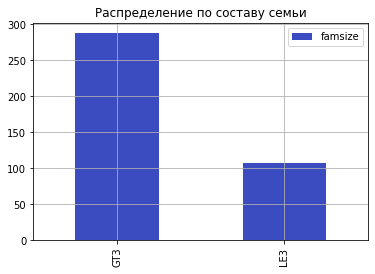

In [106]:
pd.DataFrame(math.famsize.value_counts()).plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Распределение по составу семьи')
# 'LE3' <= 3 человек, 'GT3' >3 человек

In [107]:
math.Pstatus = math.Pstatus.fillna(statistics.mode(math.Pstatus))
# Аналогично заменим пропуски на моду

In [108]:
math.Medu = math.Medu.fillna(statistics.median(math.Medu))
# Пропусков в данном столбце немного,
# Столбец количественный,заменим пропуски на медиану

<AxesSubplot:ylabel='Frequency'>

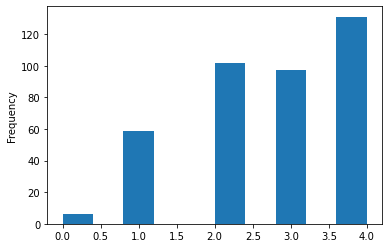

In [109]:
math.Medu.plot(kind = 'hist')

In [110]:
math.Fedu = math.Fedu.fillna(statistics.median(math.Fedu))
# Так же заменим пропуски на медиану

In [111]:
pd.DataFrame(math.Mjob.value_counts())
# Так как строка "other" самое частое из значений имеет смысл
# И пропуски заполнить "other"
math.Mjob = math.Mjob.fillna(statistics.mode(math.Mjob))

In [112]:
pd.DataFrame(math.Fjob.value_counts())
math.Fjob = math.Fjob.fillna(statistics.mode(math.Fjob))
# Аналогично "Mjob"

In [113]:
pd.DataFrame(math.reason.value_counts())
math.reason = math.reason.fillna(statistics.mode(math.reason))

In [114]:
pd.DataFrame(math.guardian.value_counts())
math.guardian = math.guardian.fillna(statistics.mode(math.guardian))

In [115]:
pd.DataFrame(math.traveltime.value_counts())
math.traveltime = math.traveltime.fillna(statistics.mode(math.traveltime))


<AxesSubplot:>

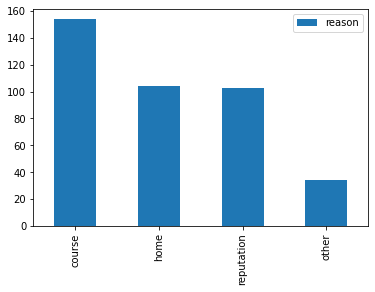

In [116]:
pd.DataFrame(math.reason.value_counts()).plot(kind = 'bar')
# Большинство студентов выбирали школу по образовательной программе

<AxesSubplot:ylabel='Frequency'>

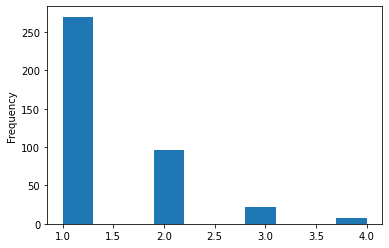

In [117]:
math.traveltime.plot(kind = 'hist')
# Большинство студентов ходили в школу неподалёку

In [118]:
pd.DataFrame(math.studytime.value_counts())
# Большинство студентов занимались дополнительно от2 до 2,5 часов
math.studytime = math.studytime.fillna(statistics.mode(math.studytime))

In [119]:
pd.DataFrame(math.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<AxesSubplot:ylabel='Frequency'>

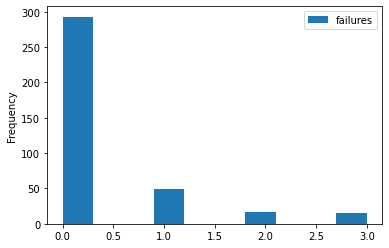

In [120]:
pd.DataFrame(math.failures).plot(kind='hist')

In [121]:
math.drop(['failures'], inplace = True, axis = 1)
# Так как параметр 'failures' малопонятный и совершенно неинформативный
# Пришёл к решению его удалить

In [61]:
math.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [122]:
pd.DataFrame(math.schoolsup.value_counts())
math.schoolsup = math.schoolsup.fillna(statistics.mode(math.schoolsup))

In [123]:
pd.DataFrame(math.famsup.value_counts())
math.famsup = math.famsup.fillna(statistics.mode(math.famsup))

In [124]:
math.paid = math.paid.fillna(statistics.mode(math.paid))

In [125]:
math.activities = math.activities.fillna(statistics.mode(math.activities))

In [126]:
math.nursery = math.nursery.fillna(statistics.mode(math.nursery))

In [127]:
math.nursery = math.nursery.fillna(statistics.mode(math.nursery))

In [128]:
math['studytime, granular'] = math['studytime, granular'].fillna(statistics.median(math['studytime, granular']))
# Пропуски заменил медианным значением

<AxesSubplot:ylabel='Frequency'>

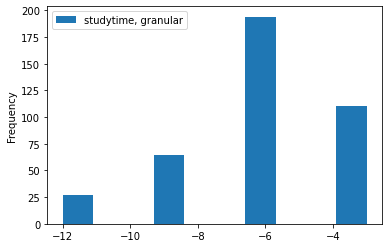

In [129]:
pd.DataFrame(math['studytime, granular']).plot(kind = 'hist')

In [130]:
math.higher = math.higher.fillna(statistics.mode(math.higher))

In [131]:
math.internet = math.internet.fillna(statistics.mode(math.internet))

In [132]:
math.romantic = math.romantic.fillna(statistics.mode(math.romantic))

In [133]:
math.famrel = math.famrel.fillna(statistics.median(math.famrel))

In [136]:
math.freetime = math.freetime.fillna(statistics.median(math.freetime))

In [137]:
math.goout = math.goout.fillna(statistics.median(math.goout))

In [138]:
math.health = math.health.fillna(statistics.median(math.health))

In [139]:
math.absences = math.absences.fillna(statistics.median(math.absences))

In [153]:
math.score = math.score.fillna(statistics.median(math.score))
# Заменил пустые значения медианным


In [154]:
pd.DataFrame(math.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


<AxesSubplot:ylabel='Frequency'>

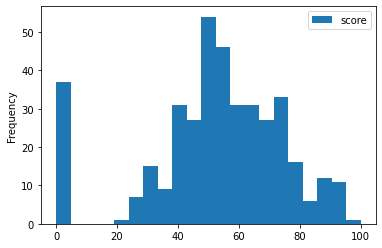

In [155]:
pd.DataFrame(math.score).plot(kind = 'hist',bins = 21)
# Судя по гистограмме значения в столбце 'score'
# распределены приблизительно нормально
# Большинство учеников получили средний бал

Все пропущенные значения в наборе данных заменили на моду или медиану,
Удалили два неинформативных столбца(school,failures)
Теперь попробуем понять как связаны между собой признаки

<AxesSubplot:>

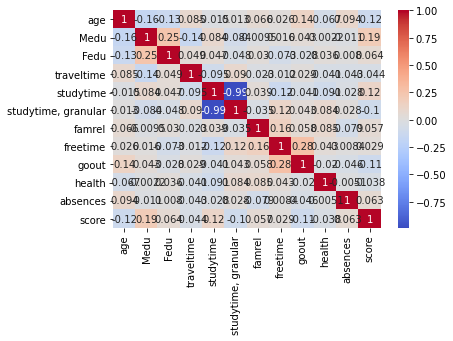

In [157]:
correlation = math.corr()
correlation
sns.heatmap(correlation,annot = True,cmap = 'coolwarm')

In [177]:
correlation.score
# Коэффициент сорреляции со score
# у всех количественных признаков небольшой

age                   -0.117239
Medu                   0.193418
Fedu                   0.063747
traveltime            -0.043875
studytime              0.115495
studytime, granular   -0.101157
famrel                 0.057423
freetime               0.029484
goout                 -0.105841
health                -0.038245
absences               0.062988
score                  1.000000
Name: score, dtype: float64

In [173]:
"""Функция для создания "боксплотов" разных признаков и их связи со score"""
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:500])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

In [169]:
math.select_dtypes(include='object').columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'],
      dtype='object')

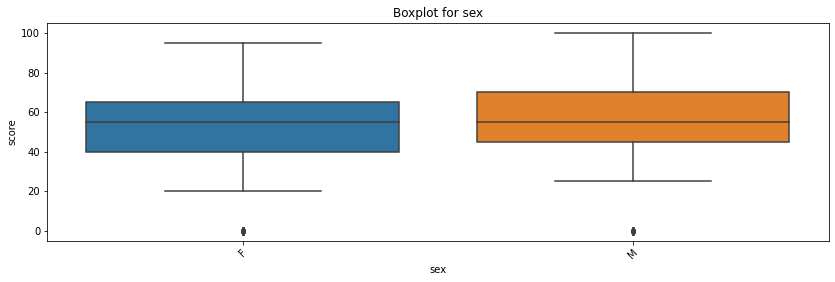

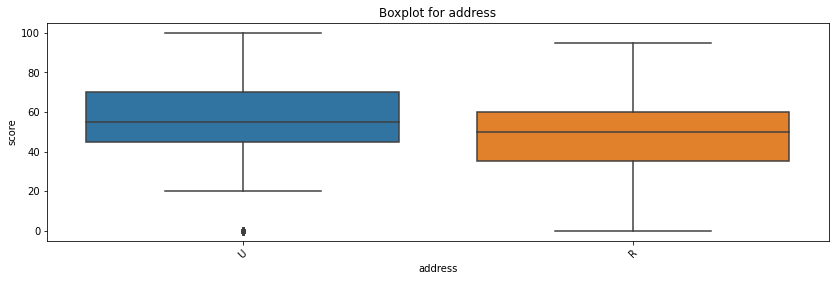

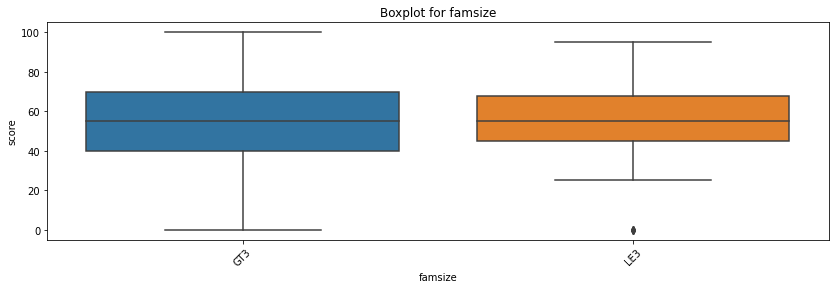

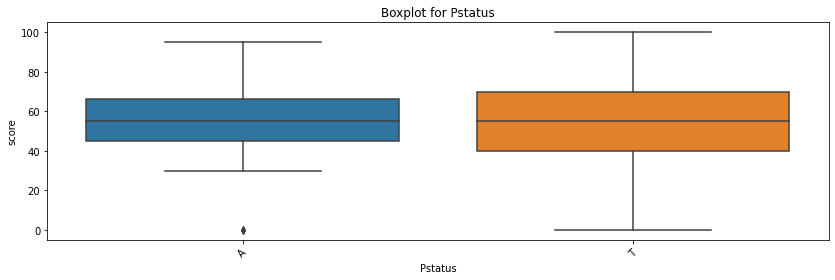

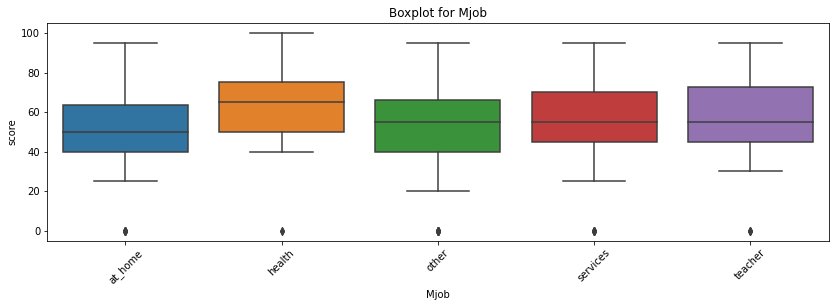

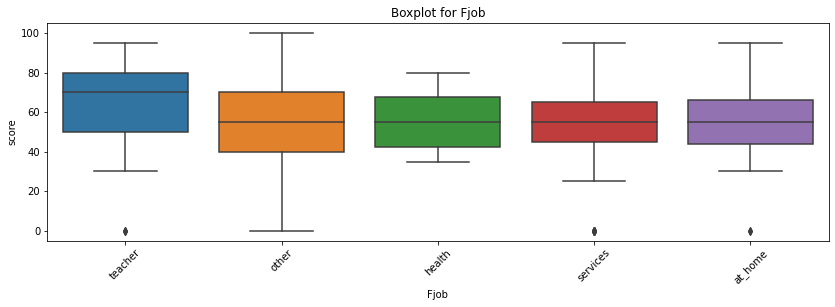

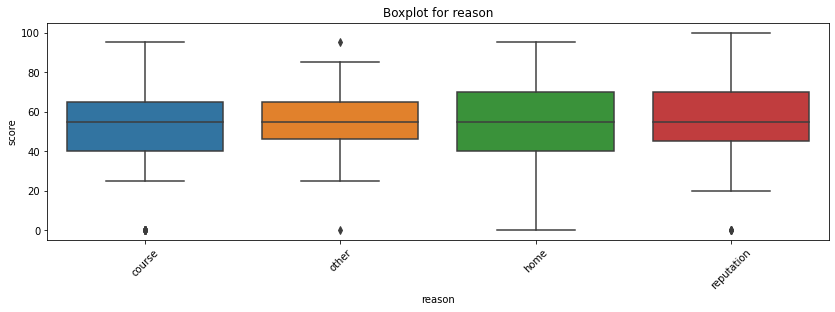

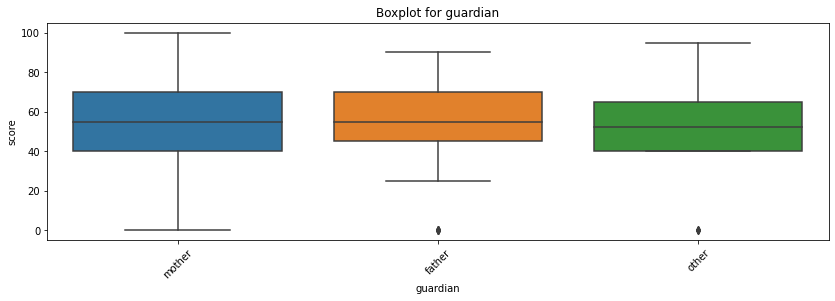

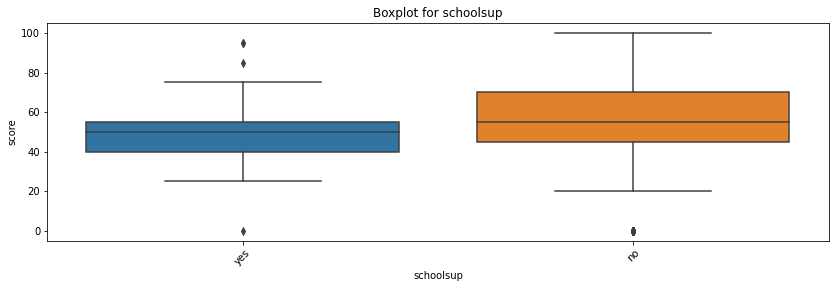

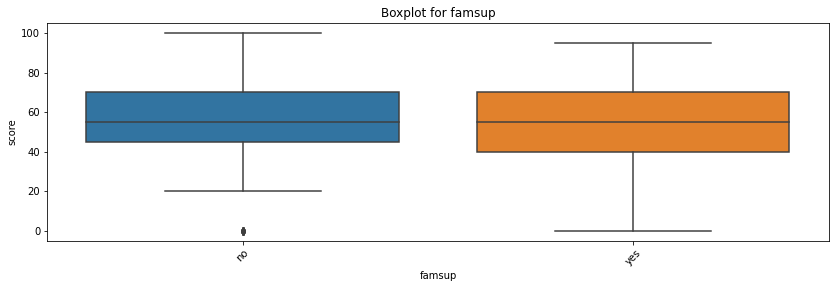

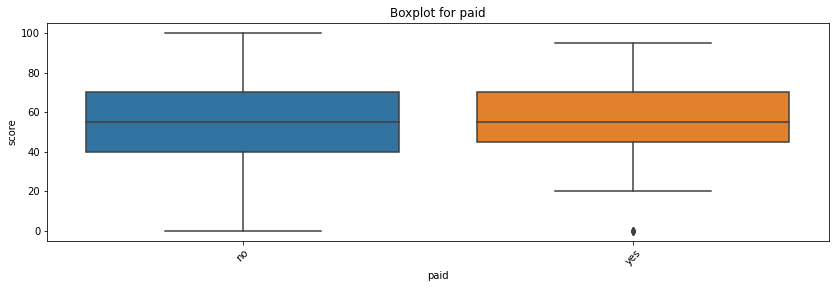

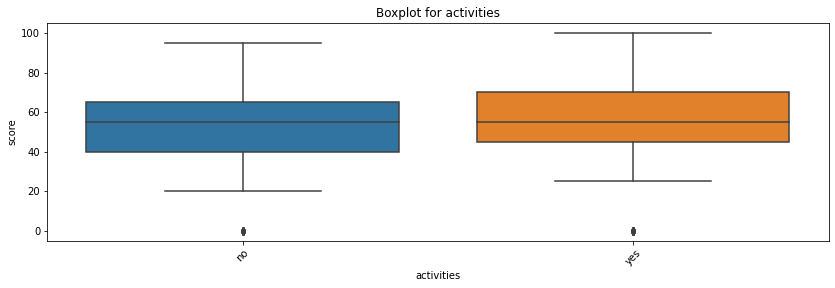

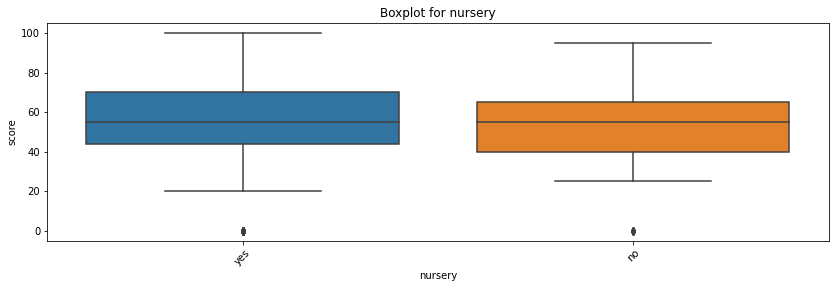

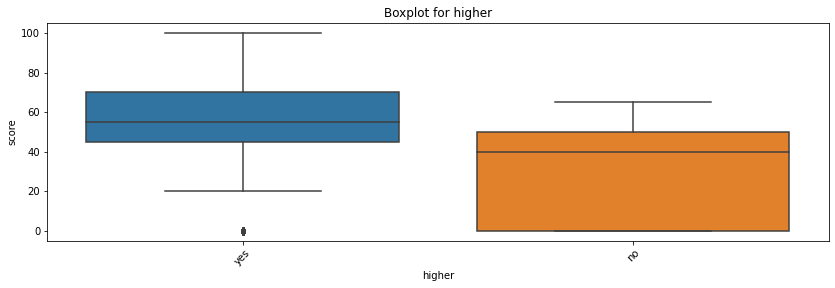

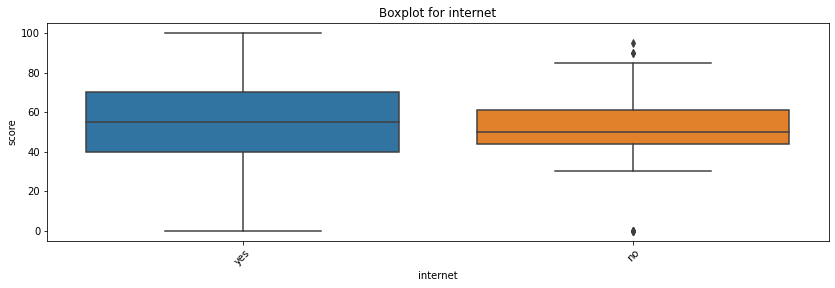

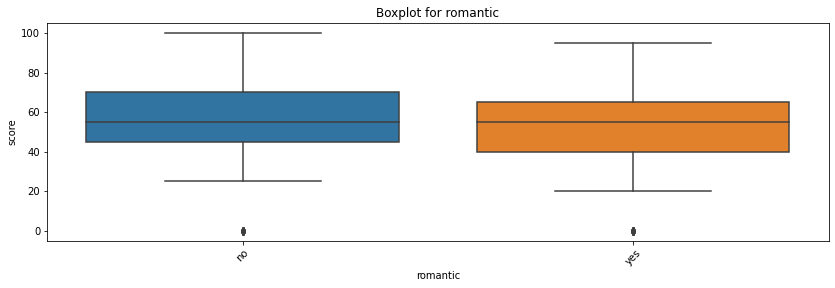

In [174]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']:
    get_boxplot(col)
# Посмотрим, различаются ли распределения балла по математике
# в зависимости от значения номинативных переменных

Судя по графикам заметно влияние на балл по математике следующих  номинативных признаков:
`address`- городской адрес,выше балл. 
`Mjob`-мама работает в сфере здравоохранения,выше балл. 
`Fjob`-папа учитель,выше балл. 
`schoolsup`-доп.обр.поддержка есть,ниже балл.  
`higher`- у желающих получить высшее образование намного выше балл. 
`internet`-у тех у кого дома интернет,выше балл. 
Сильнее всего выделяется зависимость между желанием получить высшее
образование и оценкой по математике,те кто не хочет получать высшее образование имеют низкие баллы.

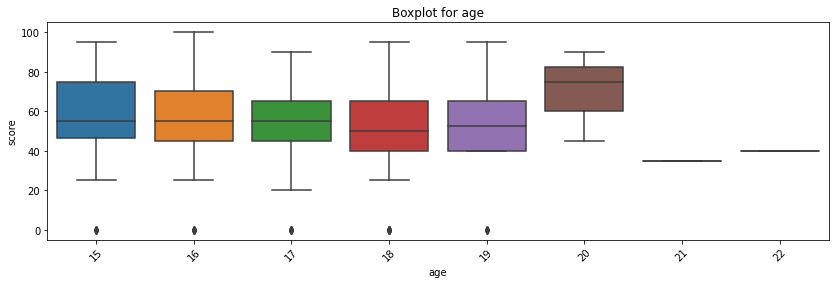

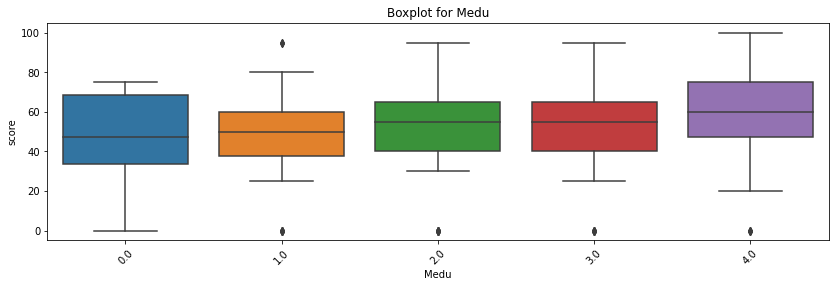

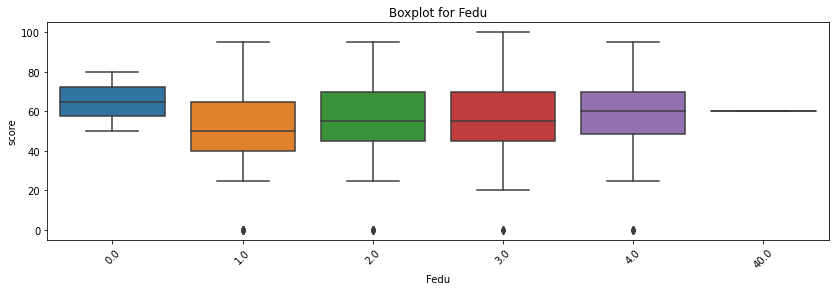

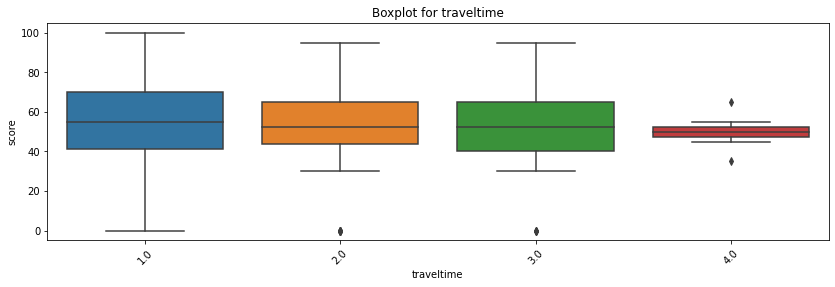

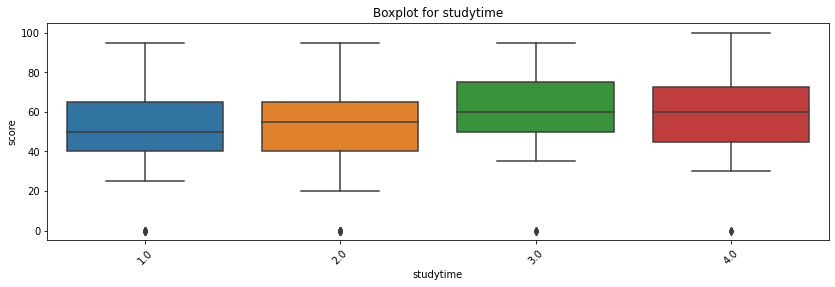

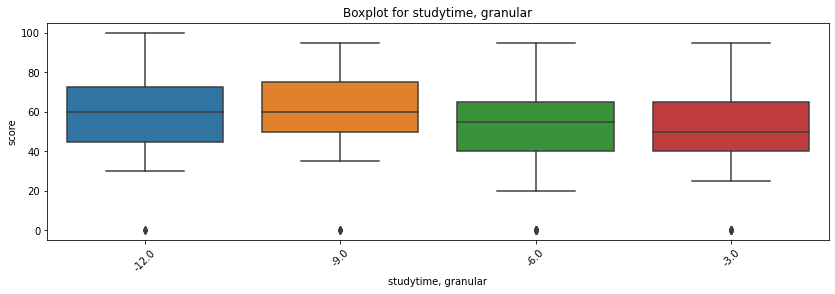

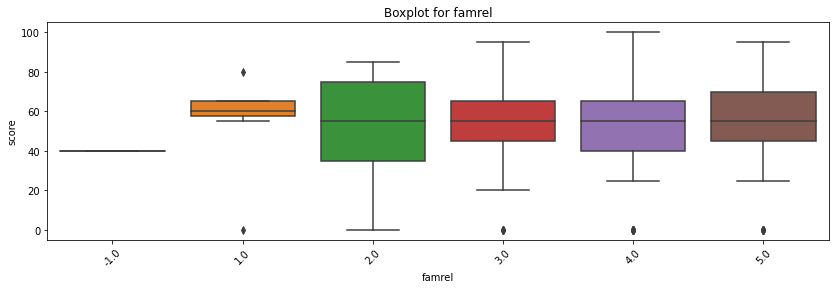

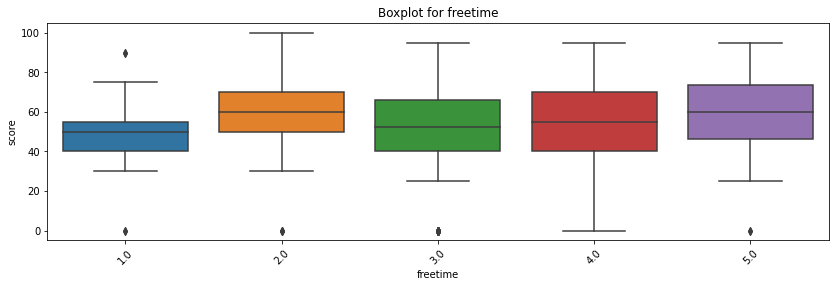

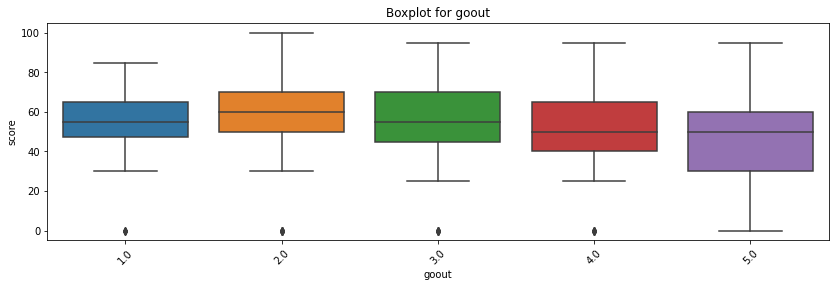

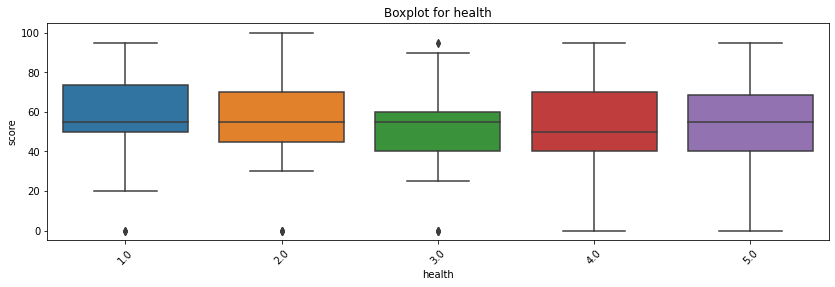

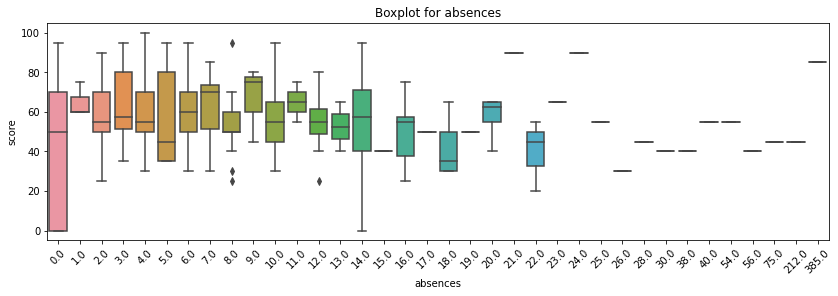

In [186]:
for col in ['age', 'Medu','Fedu','traveltime','studytime','studytime, granular','famrel',
           'freetime','goout','health','absences']:
    get_boxplot(col)
# 

Судя по графикам заметное влияние на балл по математике количественные признаки не оказывают.


In [187]:
math.drop(['sex', 'famsize', 'Pstatus', 'reason',
       'guardian', 'famsup', 'paid', 'activities', 'nursery',
       'romantic'], inplace = True, axis = 1)
# удалим  номинативные переменные,
# которые не влияют на предсказываемую величину score

In [188]:
math.drop(['studytime, granular'], inplace = True, axis = 1)
# так же удалим 'studytime, granular' так как этот столбец
# является производным от 'studytime' 
# и почти полностью коррелирует с ним

In [191]:
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


В DataFrame math осталось 17 столбцов с переменными которые оказавают 
более или менее заметное влияние на оценку по математике. 
В столбцах нет пропущенных значений,все пропущенные были заполнены либо медианным(для числовых переменных),либо самым часто встречающимся(для номинативных переменных). 
На первый взгляд кажется что только желание,точнее нежелание получать
высшее образование оказывает существенное влияние на балл по 
математике.
